In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import linalg as la

1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [4]:
N = 1000
s = 3 #number of generated sequences

#first variable distribution
mu1 = 0
sigma1 = 1
x1 = np.random.normal(mu1, sigma1, N)

#second variable distribution
mu2 = 0
sigma2 = 3
x2 = x1 + np.random.normal(mu2, sigma2, N)

#third variable distribution
x3 = 2*x1 + x2

#insert in a unique matrix
X = np.array([x1, x2, x3])
print("Matrix: \n", X, "\n")


Matrix: 
 [[-0.70343844 -0.48478703 -2.29897828 ... -0.43342723  0.02583312
  -1.12957635]
 [-2.07402205  2.98357577 -1.055886   ... -5.93289791  0.90231809
   1.34934848]
 [-3.48089893  2.01400172 -5.65384257 ... -6.79975236  0.95398432
  -0.90980422]] 



In [5]:
#EIGENVALUES AND EIGENVECTORS

#Eigendecomposition of the covariance matrix:
cov = np.cov(X, bias=True)
print("Covariance matrix: \n", cov, "\n")
l, V = la.eig(cov)
l = np.real_if_close(l)

#Singular Value Decomposition (SVD):
U, S, Vt = np.linalg.svd(X)
l_svd = S**2/(N-1)
V_svd = U

print("Eigenvalues via eigendecomposition:\n", l)
print("\nEigenvalues via SVD:\n", l_svd)

print("\nEigenvectors via eigendecomposition:\n", V)
print("\nEigenvectors via SVD:\n", V_svd)

Covariance matrix: 
 [[ 0.96942859  1.01053958  2.94939676]
 [ 1.01053958 10.28793064 12.30900979]
 [ 2.94939676 12.30900979 18.20780331]] 

Eigenvalues via eigendecomposition:
 [ 2.75128633e+01 -8.87947568e-16  1.95229928e+00]

Eigenvalues via SVD:
 [2.76091173e+01 1.95587142e+00 3.54791532e-30]

Eigenvectors via eigendecomposition:
 [[-0.11165548 -0.81649658  0.56645069]
 [-0.5821021  -0.40824829 -0.70320017]
 [-0.80541306  0.40824829  0.42970122]]

Eigenvectors via SVD:
 [[-0.11142235  0.5664966  -0.81649658]
 [-0.58239146 -0.70296054 -0.40824829]
 [-0.80523615  0.43003265  0.40824829]]


In [6]:
#DATASET VARIABILITY
Lambda = np.diag(l)  #diagonal matrix of the eigenvalues 
trace_lambda = Lambda.trace()
print("Lambda:\n", Lambda)
print("Trace(Lambda):\n", trace_lambda, '\n')

percent = (Lambda[0,0]/trace_lambda)*100
print("Selecting the 0 component, we retain %.2f%% of the total variability." % percent)

print("\nGiven how the dataset is constructed, this makes sense since the bigger the dimension is and the less \
our variables can represent the samples. We need to reduce the dimensionality of the system.")

Lambda:
 [[ 2.75128633e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -8.87947568e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.95229928e+00]]
Trace(Lambda):
 29.465162537921948 

Selecting the 0 component, we retain 93.37% of the total variability.

Given how the dataset is constructed, this makes sense since the bigger the dimension is and the less our variables can represent the samples. We need to reduce the dimensionality of the system.


In [7]:
#REDUCE THE DIMENSIONALITY OF THE SYSTEM
cov_lambda = np.cov(Lambda)  #covariance matrix of the Lambda matrix
l2, V2 = la.eig(cov_lambda)        #eigenvalues and eigenvectors for the new covariance matrix
l2 = np.real_if_close(l2)

Lambda2 = np.diag(l2)       #diagonal matrix of the new eigenvalues
trace_cov_lambda = cov_lambda.trace()
trace_lambda2 = Lambda2.trace()

print("The new diagonal Lambda matrix after reduction is:\n", Lambda2)
print("\nTrace of the new Lambda:\n", trace_lambda2)

percent2 = (Lambda2[0,0]/trace_lambda2)*100
print("\nAfter reduction of the dimensionality the %.2f%% of the total variability is retained." % percent2)

The new diagonal Lambda matrix after reduction is:
 [[2.52638040e+02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.51665614e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.82582890e-31]]

Trace of the new Lambda:
 253.5897057378312

After reduction of the dimensionality the 99.62% of the total variability is retained.


In [8]:
#REDEFINE THE DATA IN THE NEW BASIS 
#(i.e. the basis generated by the eigenvectors of the original covariance matrix)

Xp = np.dot(V.T, X) #rotation of the data points
print("The dataset in the new basis is:\n", Xp)

The dataset in the new basis is:
 [[ 4.08939680e+00 -3.30471989e+00  5.42500561e+00 ...  8.97855622e+00
  -1.29647710e+00  7.34329950e-02]
 [ 2.35283174e-18 -1.47896544e-15 -2.45542696e-15 ...  1.23492983e-15
  -2.91101260e-16 -1.71669608e-15]
 [-4.35757054e-01 -1.50723994e+00 -2.98922168e+00 ...  1.00463777e+00
  -2.09948813e-01 -1.97965536e+00]]


Text(0, 0.5, 'x2')

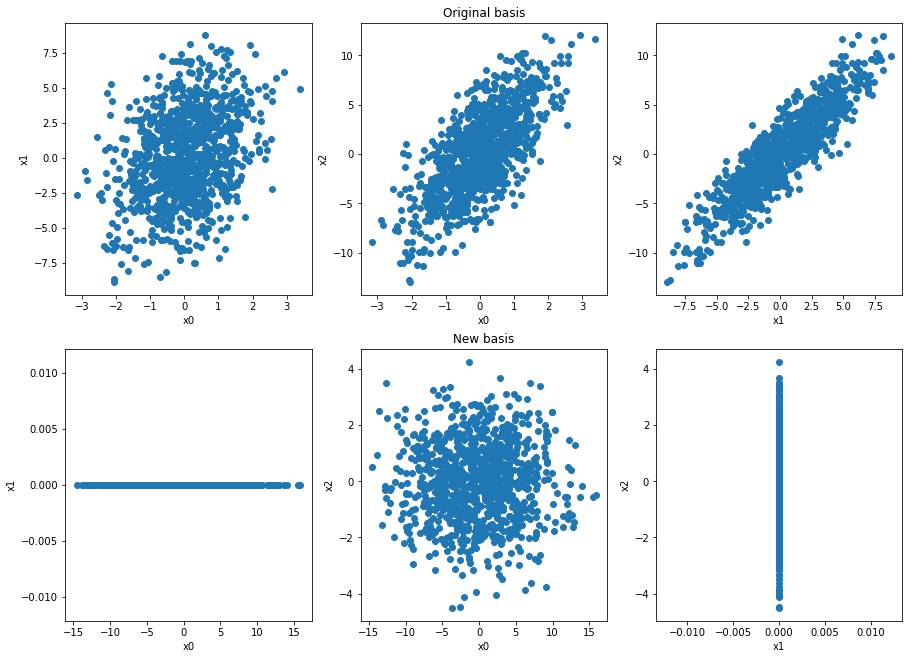

In [9]:
#PLOT THE DATA 
fig = plt.figure(figsize=(15,11))
columns = 3
rows = 2
ax = []
for i in range(1, columns*rows+1):
    ax.append(fig.add_subplot(rows, columns, i))

#first row: original basis
ax[0].scatter(X[0,:], X[1,:])
ax[0].set_xlabel("x0")
ax[0].set_ylabel("x1")
ax[1].scatter(X[0,:], X[2,:])
ax[1].set_xlabel("x0")
ax[1].set_ylabel("x2")
ax[1].set_title("Original basis")
ax[2].scatter(X[1,:], X[2,:])
ax[2].set_xlabel("x1")
ax[2].set_ylabel("x2")

#new basis
ax[3].scatter(Xp[0,:], Xp[1,:])
ax[3].set_xlabel("x0")
ax[3].set_ylabel("x1")
ax[4].scatter(Xp[0,:], Xp[2,:])
ax[4].set_xlabel("x0")
ax[4].set_ylabel("x2")
ax[4].set_title("New basis")
ax[5].scatter(Xp[1,:], Xp[2,:])
ax[5].set_xlabel("x1")
ax[5].set_ylabel("x2")


2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [10]:
stdev = 0.05
mean = 0

random = []
for i in range(10):
    random.append(np.random.normal(mean, stdev, N))
    
noise = np.array(random)
X_noise = np.concatenate((X, noise), axis=0)
print("The matrix with uncorrelated noise is:\n", X_noise)


The matrix with uncorrelated noise is:
 [[-7.03438439e-01 -4.84787030e-01 -2.29897828e+00 ... -4.33427226e-01
   2.58331193e-02 -1.12957635e+00]
 [-2.07402205e+00  2.98357577e+00 -1.05588600e+00 ... -5.93289791e+00
   9.02318086e-01  1.34934848e+00]
 [-3.48089893e+00  2.01400172e+00 -5.65384257e+00 ... -6.79975236e+00
   9.53984325e-01 -9.09804216e-01]
 ...
 [-2.04905241e-02  9.89887046e-02 -1.38580709e-02 ...  2.63486561e-02
  -1.57526000e-02 -1.34062438e-02]
 [ 3.07634315e-02 -1.23404937e-02 -3.89123582e-02 ...  1.72164511e-02
  -4.56064162e-02 -1.61267787e-02]
 [ 4.61232328e-02 -2.40717553e-03  8.66523258e-02 ... -4.64499863e-02
  -8.16569503e-02 -5.06034256e-02]]


In [11]:
#PCA procedure
#Eigendecomposition of the covariance matrix:
cov_noise = np.cov(X_noise, bias=True)
#print("Covariance matrix: \n", cov_noise, "\n")
l_noise, V_noise = la.eig(cov_noise)
l_noise = np.real_if_close(l_noise)

#Singular Value Decomposition (SVD):
U_n, S_n, Vt_n = np.linalg.svd(X_noise)
l_svd_n = S_n**2/(N-1)
V_svd_n = U_n

print("Eigenvalues via eigendecomposition:\n", l_noise)
print("\nEigenvalues via SVD:\n", l_svd_n)

print("\nEigenvectors via eigendecomposition:\n", V_noise)
print("\nEigenvectors via SVD:\n", V_svd_n)

Eigenvalues via eigendecomposition:
 [ 2.75128715e+01  1.95232253e+00 -1.11714369e-16  2.02734825e-03
  2.91519486e-03  2.24925049e-03  2.34074742e-03  2.37749026e-03
  2.46254678e-03  2.73209562e-03  2.69486244e-03  2.61739099e-03
  2.57488682e-03]

Eigenvalues via SVD:
 [2.76091256e+01 1.95589497e+00 2.91994242e-03 2.73529925e-03
 2.69757380e-03 2.62131998e-03 2.57795859e-03 2.46619065e-03
 2.38171597e-03 2.34314960e-03 2.25197543e-03 2.03198577e-03
 7.84438693e-32]

Eigenvectors via eigendecomposition:
 [[-1.11655459e-01 -5.66447322e-01  8.16496581e-01 -7.86504828e-04
  -2.92837000e-04 -9.57881475e-04  6.10842689e-04 -3.37563003e-04
   2.22734756e-04 -4.62042931e-04  9.40106847e-04 -7.48903750e-04
   8.31328957e-05]
 [-5.82102019e-01  7.03195939e-01  4.08248290e-01  1.05127630e-03
   2.08495366e-04  9.64733859e-04 -8.40449496e-04  5.41356866e-04
  -3.39639437e-04  5.21167860e-04 -1.15750192e-03  1.08226943e-03
  -2.59156449e-04]
 [-8.05412936e-01 -4.29698704e-01 -4.08248290e-01 -5.2

OBSERVATION: The higher is the dimension of the system and the more the results from the SVD procedure deviate from the eigendecomposition method results.

In [12]:
#PERCENTAGE OF VARIABILITY
Lambda_n = np.diag(l_noise)  #diagonal matrix of the eigenvalues 
t_lambda = Lambda_n.trace()
print("Lambda:\n", Lambda_n)
print("Trace(Lambda):\n", t_lambda, '\n')

percent_n = (Lambda_n[0,0]/t_lambda)*100
print("The principal component accounts for %.2f%% of the total variability." % percent_n)

Lambda:
 [[ 2.75128715e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  1.95232253e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11714369e-16  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.02734825e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   2.91519486e-03  0.00000000e+00  0.00000000e+00  0.0000

OBSERVATION: The percentage of variability is the same found for the first case, before dimensionality reduction. 

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [2]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [13]:
df = pd.read_csv("data/magic04.data", sep=",", header=None)

#convert the data to a matrix
M = df.to_numpy()
M = M[0:, 0:10]
M = np.asarray(M, dtype='float32')

#covariance matrix of the transpose M
cov = np.cov(M.T)

#Eigendecomposition of the covariance matrix:
l, V = la.eig(cov)
l = np.real_if_close(l)

print("Eigenvalues: ", l)
print("\nEigenvectors: ", V)


#DATASET VARIABILITY
Lambda = np.diag(l)  #diagonal matrix of the eigenvalues 
trace_lambda = Lambda.trace()

percent = (Lambda[0,0]/trace_lambda)*100
print("\nConsidering the 0 component, %.2f%% of the total variability is retained." % percent)
print("In order to increase the percent of retained variability we should reduce the dimensionality of the system. \
We can find the negligible variables by looking at the variability for each component: ")

for i in range(len(l)):
    perc = (Lambda[i,i]/trace_lambda)*100
    print("Component", i, ", retained variability: %.2f%%" % perc)

print("So, in order to increase the percentage of retained variability one could discard the last 3 components \
since they retain 0% of variability.")

Eigenvalues:  [6.57979141e+03 3.85387048e+03 2.01638313e+03 1.32675968e+03
 6.10187260e+02 4.33599172e+02 1.17330074e+02 8.63965837e-02
 1.07363852e-02 3.85322855e-04]

Eigenvectors:  [[ 3.27812305e-01  1.34406332e-01 -6.55078493e-02 -8.63988253e-01
  -9.45511967e-02 -1.98552032e-02  3.38166663e-01  3.99907118e-03
  -4.54836723e-04  4.57080102e-05]
 [ 1.13810000e-01  5.38837224e-02  1.89938171e-02 -3.19766485e-01
   1.97548493e-02  2.32592313e-02 -9.38307839e-01  1.33847862e-02
   6.74902713e-04 -5.73158322e-05]
 [ 3.06076691e-03 -6.59372008e-04 -1.05931761e-03 -6.93028661e-03
  -2.65185255e-03  1.33441541e-04 -1.08823227e-02 -9.27765189e-01
  -3.72229857e-01  2.26331398e-02]
 [-9.27109146e-04  2.58205309e-04  5.10399702e-04  2.60555110e-03
   1.53899865e-03 -3.46437577e-05  3.06287143e-03  3.22020553e-01
  -7.69222366e-01  5.51887659e-01]
 [-5.21882398e-04  1.52710005e-04  2.94635944e-04  1.51275933e-03
   9.19340565e-04 -2.21501580e-05  1.81386901e-03  1.88001795e-01
  -5.19365740e-0